## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [25]:
# Your code here - remember to use markdown cells for comments as well!

import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from geopy.distance import geodesic

from sklearn.preprocessing import StandardScaler

In [12]:
data = pd.read_csv('../data/kc_house_data.csv')

In [13]:
#data.columns

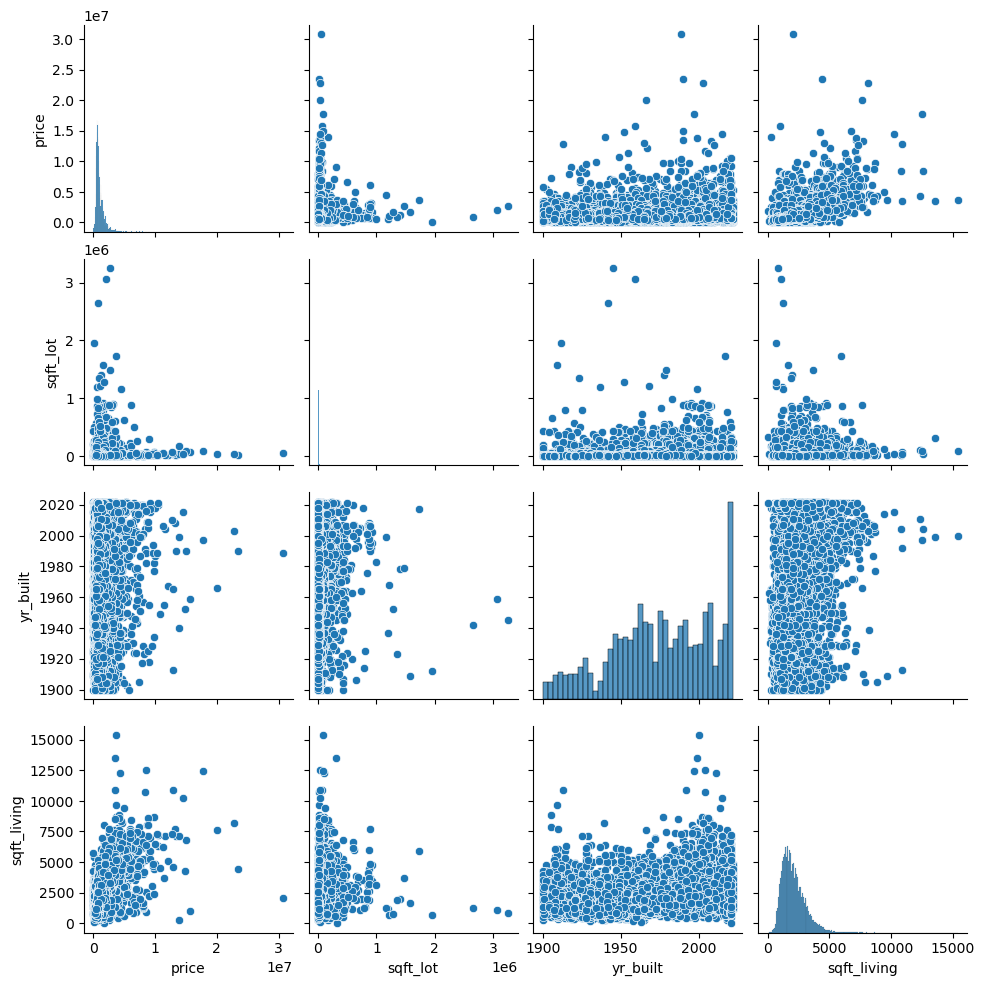

In [10]:
#sns.pairplot(data[['price', 'sqft_lot', 'yr_built', 'sqft_living']])

In [14]:
def zip_code(address):
    x = address.split(' ')[-3]

    return x.split(',')[0]
    

In [15]:
data['zip_code'] = data['address'].apply(lambda x: zip_code(x))

In [16]:
#data['zip_code'] = data['zip_code'].astype('int')

In [17]:
data['zip_code'] = data['address'].apply(lambda x: zip_code(x))

In [20]:
data['address'].unique()

array(['2102 Southeast 21st Court, Renton, Washington 98055, United States',
       '11231 Greenwood Avenue North, Seattle, Washington 98133, United States',
       '8504 South 113th Street, Seattle, Washington 98178, United States',
       ...,
       '910 Martin Luther King Jr Way, Seattle, Washington 98122, United States',
       '17127 114th Avenue Southeast, Renton, Washington 98055, United States',
       '18615 7th Avenue South, Burien, Washington 98148, United States'],
      dtype=object)

<Axes: >

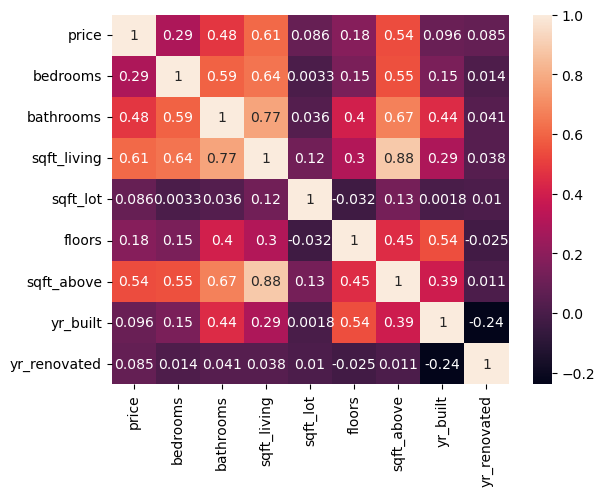

In [299]:
sns.heatmap(data[[ 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'yr_built',
       'yr_renovated']].corr(), annot= True)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures

In [29]:
X_testing_data = data[['sqft_lot', 'yr_built' ,'sqft_living', 'floors', 'yr_built']]
y_testing_data = data['price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_testing_data, y_testing_data, test_size = 0.3)

In [31]:
ss = StandardScaler()

In [32]:
ss.fit(X_train)


StandardScaler()

In [33]:
X_standardized_train = ss.transform(X_train)

In [34]:
X_standardized_test = ss.transform(X_test)

In [35]:
lr_raw = LinearRegression()
lr_raw.fit(X_standardized_train, y_train)

lr_raw.score(X_standardized_train, y_train)

0.3947071078812264

In [36]:
lr_raw.score(X_standardized_test, y_test)

0.3473020427045367

In [37]:
pd.Series(lr_raw.coef_,
          index = X_testing_data.columns) 

sqft_lot         5801.404881
yr_built       -50187.856989
sqft_living    564091.009204
floors          45327.954227
yr_built       -50187.856989
dtype: float64

In [272]:
y_pred = lr_raw.predict(X_standardized_test)
mean_absolute_error(y_pred, y_test)

395577.070626913

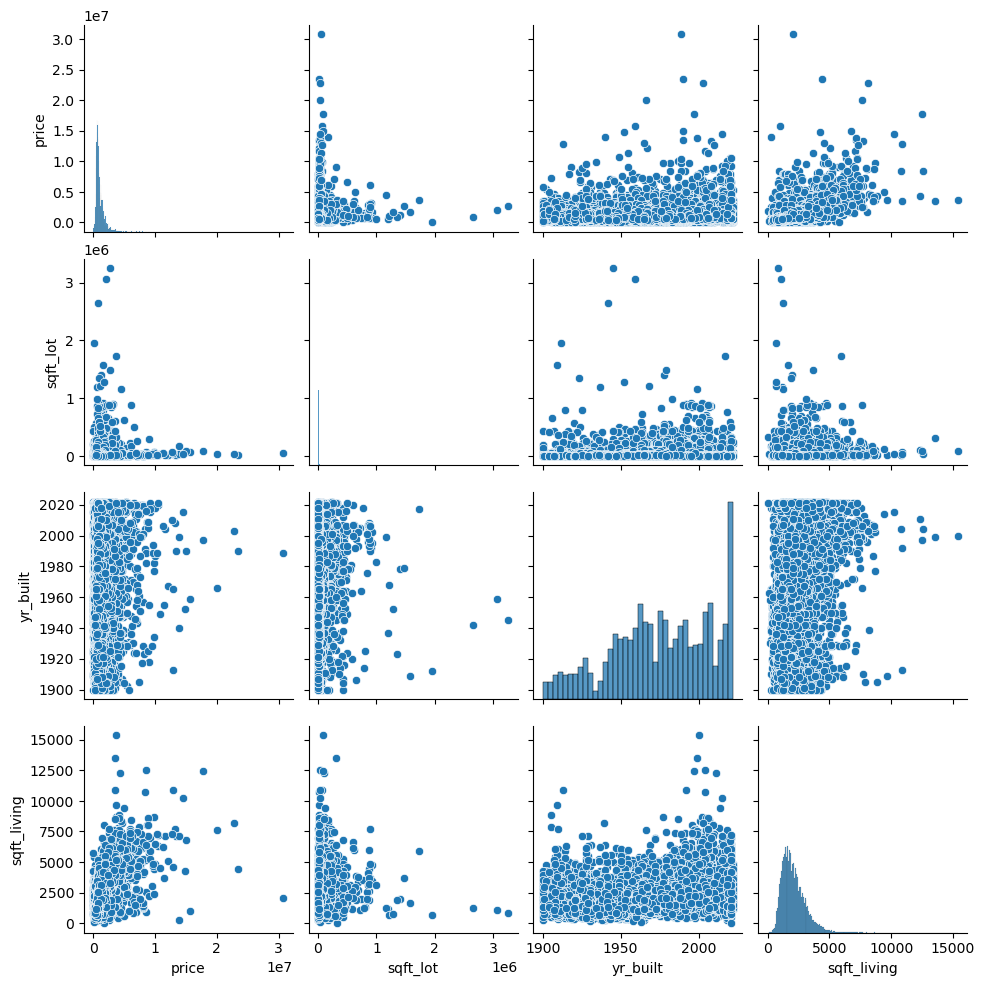

In [274]:
sns.pairplot(data[['price', 'sqft_lot', 'yr_built', 'sqft_living']])

In [181]:
data_focused.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'condition', 'grade',
       'heat_source', 'sewer_system', 'sqft_garage', 'sqft_patio', 'yr_built',
       'address', 'lat', 'long', 'location', 'distance_to_amazon'],
      dtype='object')

In [130]:
data_focused = data.drop(columns = [
    'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated'])

In [131]:
data_focused = data_focused.dropna()

In [193]:
data_focused['condition'].value_counts()

Average      17368
Good          7888
Very Good     3179
Fair           220
Poor            60
Name: condition, dtype: int64

In [195]:
data_focused['condition'] = data_focused['condition'].astype('category')

In [ ]:
data_focused['condition']

In [203]:
data_focused.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'condition', 'grade',
       'heat_source', 'sewer_system', 'sqft_garage', 'sqft_patio', 'yr_built',
       'address', 'lat', 'long', 'location', 'distance_to_amazon',
       'grade_num'],
      dtype='object')

In [21]:
#data_focused['grade_num'] = data_focused['grade_num'].as_numeric

In [222]:
heatmap_data = data_focused[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance',
       'condition', 'grade', 'distance_to_amazon', 'grade_num']]

<Axes: >

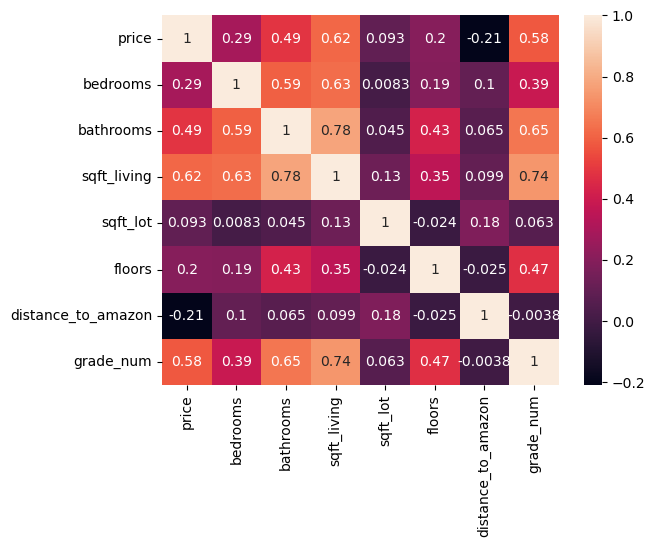

In [227]:
sns.heatmap(heatmap_data.corr(), annot = True)#, mask = heatmap_data.corr())

In [201]:
data_focused['grade_num'] = data_focused['grade'].apply(lambda x: x.split(' ')[0])

In [207]:
data_focused['grade_num'].value_counts()

7     11358
8      8735
9      3555
6      2750
10     1342
11      401
5       375
12      121
4        44
13       24
3         9
2         1
Name: grade_num, dtype: int64

In [245]:
data['view'].value_counts()

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64

In [213]:
data_focused['grade_num'] = data_focused['grade_num'].astype('float')

In [126]:
micro_coord = (47.63959872758785, -122.12826883333561)

amazon_coord = (47.606200, -122.332100)
amazing_coord = (47.615722, -122.339494)

In [132]:
data_focused['location'] = list(zip(data_focused.lat, data_focused.long))

In [133]:
data_focused['distance_to_amazon'] = data_focused['location'].apply(lambda x: geodesic(x, amazing_coord).miles)

In [128]:
data_focused.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,distance_to_amazon
count,2.876200e+04,2.876200e+04,28762.000000,28762.000000,28762.000000,2.876200e+04,28762.000000,28762.000000,28762.000000,28762.000000,28762.000000,28762.000000,28762.000000
mean,4.539892e+09,1.119835e+06,3.440964,2.337268,2135.288401,1.633806e+04,1.518184,336.540505,215.972046,1973.839684,47.547536,-122.218405,12.004148
std,2.883593e+09,8.991776e+05,0.977979,0.895685,978.296832,5.403905e+04,0.549250,285.447910,245.983918,31.665882,0.141876,0.139024,6.961229
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,1900.000000,47.178090,-122.526650,0.632573
25%,2.073550e+09,6.500000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,0.000000,40.000000,1952.000000,47.437675,-122.329489,6.030844
50%,3.876002e+09,8.750000e+05,3.000000,2.500000,1950.000000,7.537500e+03,1.500000,400.000000,140.000000,1976.000000,47.560415,-122.239692,10.570603
75%,7.287100e+09,1.320000e+06,4.000000,3.000000,2640.000000,1.072300e+04,2.000000,516.250000,310.000000,2001.000000,47.672590,-122.134206,17.186697
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.067495e+06,4.000000,3580.000000,4370.000000,2022.000000,47.876700,-121.717050,30.714703


In [136]:
data_focused_15 = data_focused[data_focused['distance_to_amazon'] <= 15]

In [145]:
data_focused_10 = data_focused[data_focused['distance_to_amazon'] <= 10]

In [ ]:
data

In [400]:
data_focused_10['zip_code'] = data_focused_10['address'].apply(lambda x: zip_code(x))


In [404]:
data_focused_10['zip_code'].nunique()

40

In [416]:
data_focused_10['zip_category'] = data_focused_10['zip_code'].astype('int')

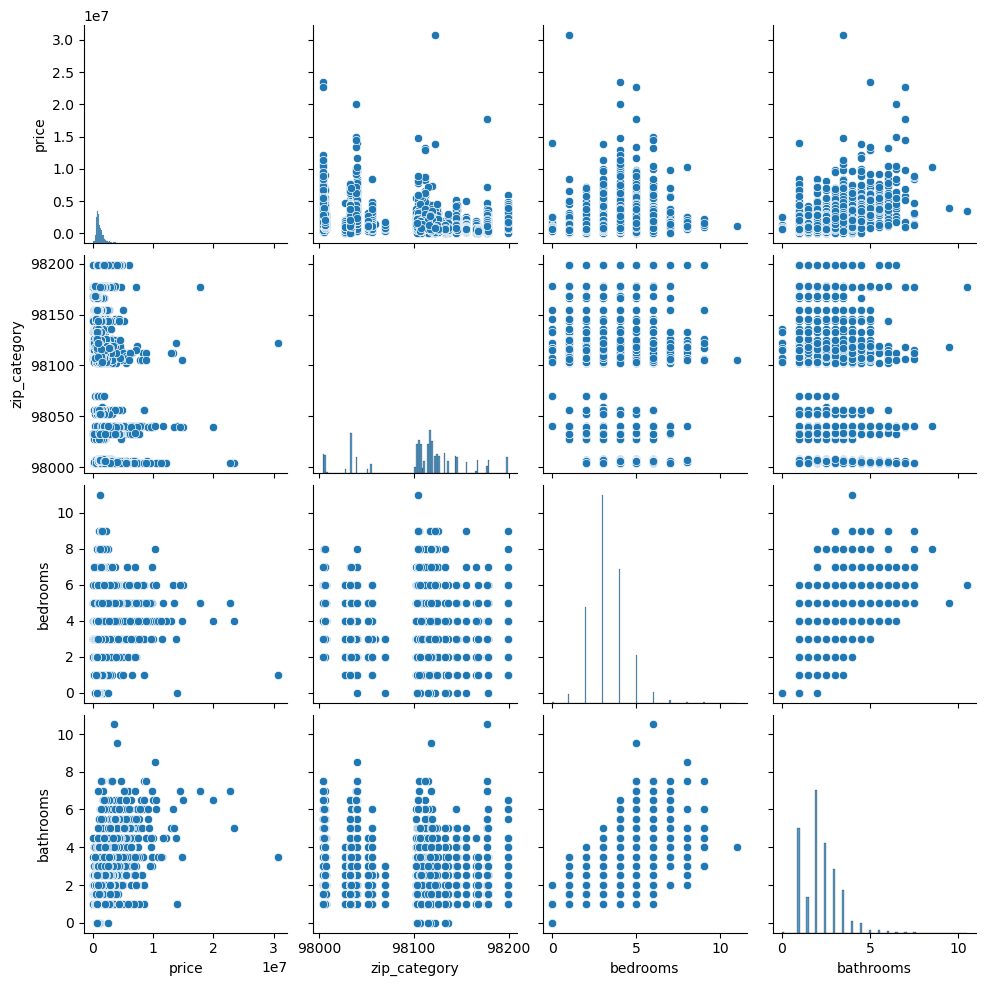

In [418]:
sns.pairplot(data_focused_10[['price','zip_category', 'bedrooms', 'bathrooms']])

In [43]:
def geo_distance(coord_a, coord_b):
    #take two coordinates and calculate distances in miles
    
    return geodesic(coord_a, coord_b).miles

In [37]:
geodesic(micro_coord, (47.461975, -122.19052)).miles

12.611821174297864

In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures


In [232]:
sorted(data_focused['grade_num'].unique())

[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]

In [235]:
X_train, X_test, y_train, y_test = train_test_split(data_focused['grade_num'], data_focused['price'], test_size = 0.3)

lr_simple = LinearRegression()


In [236]:
lr_simple.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [237]:
print(lr_simple.coef_, lr_simple.intercept_)

[453216.4407876] -2338026.4167613545


In [238]:
lr_simple.score(X_train.values.reshape(-1,1),
                y_train)

0.31652146111692625

In [239]:
y_pred = lr_simple.predict(X_test.values.reshape(-1,1))
mean_absolute_error(y_pred, y_test)

410386.47061725025

In [240]:
ss = StandardScaler()

In [241]:
ss.fit(X_train)
X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[8. 8. 8. ... 6. 9. 8.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.